In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.linalg import norm
%matplotlib inline

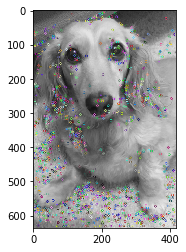

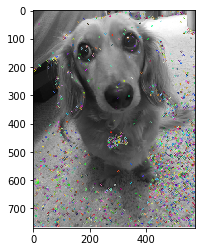

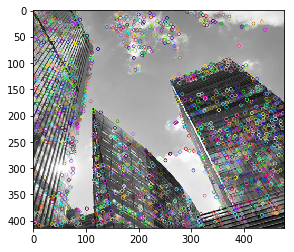

1 vs 2 match: 151
1 vs 3: 107


In [52]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img3 = cv2.imread('3.jpg')

kp_set1 = sift_extract(img1, plot=True)  # input img to test against others
kp_set2 = sift_extract(img2, plot=True)
kp_set3 = sift_extract(img3, plot=True)

print("1 vs 2 match:",count_keypoint_match(sift_set1, kp_set2))
print("1 vs 3:",count_keypoint_match(sift_set1, kp_set3))

In [48]:
def compare_images_sift_extract(db_imgs):
    db_kps = []
    for img in db_imgs:
        kps = sift_extract(img)
        db_kps.append(kps)
    return db_kps


def sift_extract(fig, plot=False):
    grey = cv2.cvtColor(fig, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, dsc = sift.detectAndCompute(grey,None)
    if plot:
        display = cv2.drawKeypoints(grey, kp, fig)
        plt.imshow(display)
        plt.show()
    return dsc


def count_keypoint_match(query_kps, compare_kps):
    count = 0
    for kp1 in query_kps:
        # Euclidean dist
        pairwise_dist = []
        for kp2 in compare_kps:
            d = norm(kp1-kp2)
            pairwise_dist.append(d)
        if all(n == 0 for n in pairwise_dist) or len(pairwise_dist) == 1:
            count += 1
            continue
        # find 2 nearest neighbors
        dist = np.sort(np.asarray(pairwise_dist))
        nn1 = dist[0]
        nn2 = dist[1]
        # ratio test
        if  nn1 / float(nn2) < 0.9:
            count += 1
    return count



def find_similar_images(query_img, query_label, compare_imgs, compare_labels):
    
    # extract query image keypoints
    query_kps = sift_extract(query_img)

    # extract other images' keypoints
    compare_kps_collection = compare_images_sift_extract(compare_imgs)
    
    match_count = {}
    for i, compare_kps in enumerate(compare_kps_collection):
        count = count_keypoint_match(query_kps, compare_kps)
        match_count[i] = count
    
    # get top 10 matches  TBD: determine cutoff
    ranked = sorted(match_count.items(),key=lambda kv:kv[1], reverse=True)
    idx = [ranked[i][0] for i in range(10)]
    
    # check class labels
    print("query image class label:", query_label)
    print("top matches' class labels:", [compare_labels[i] for i in idx])

In [42]:
%store -r train_set
%store -r test_set

train_data, train_labels = train_set.train_data, train_set.train_labels
test_data, test_labels = test_set.test_data, test_set.test_labels

query_img, query_label = train_data[0], train_labels[0]
compare_img, compare_label = train_data[:20], train_labels[:20]

In [43]:
find_similar_images(query_img, query_label, compare_img, compare_label)

query image class label: 6
top matches' class labels: [6, 4, 9, 9, 4, 2, 6, 1, 7, 7]


In [44]:
compare_label   # TBD: determine relevance metric

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]